<a href="https://colab.research.google.com/github/Starrz09/Titanic_classification/blob/main/Titanic_notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

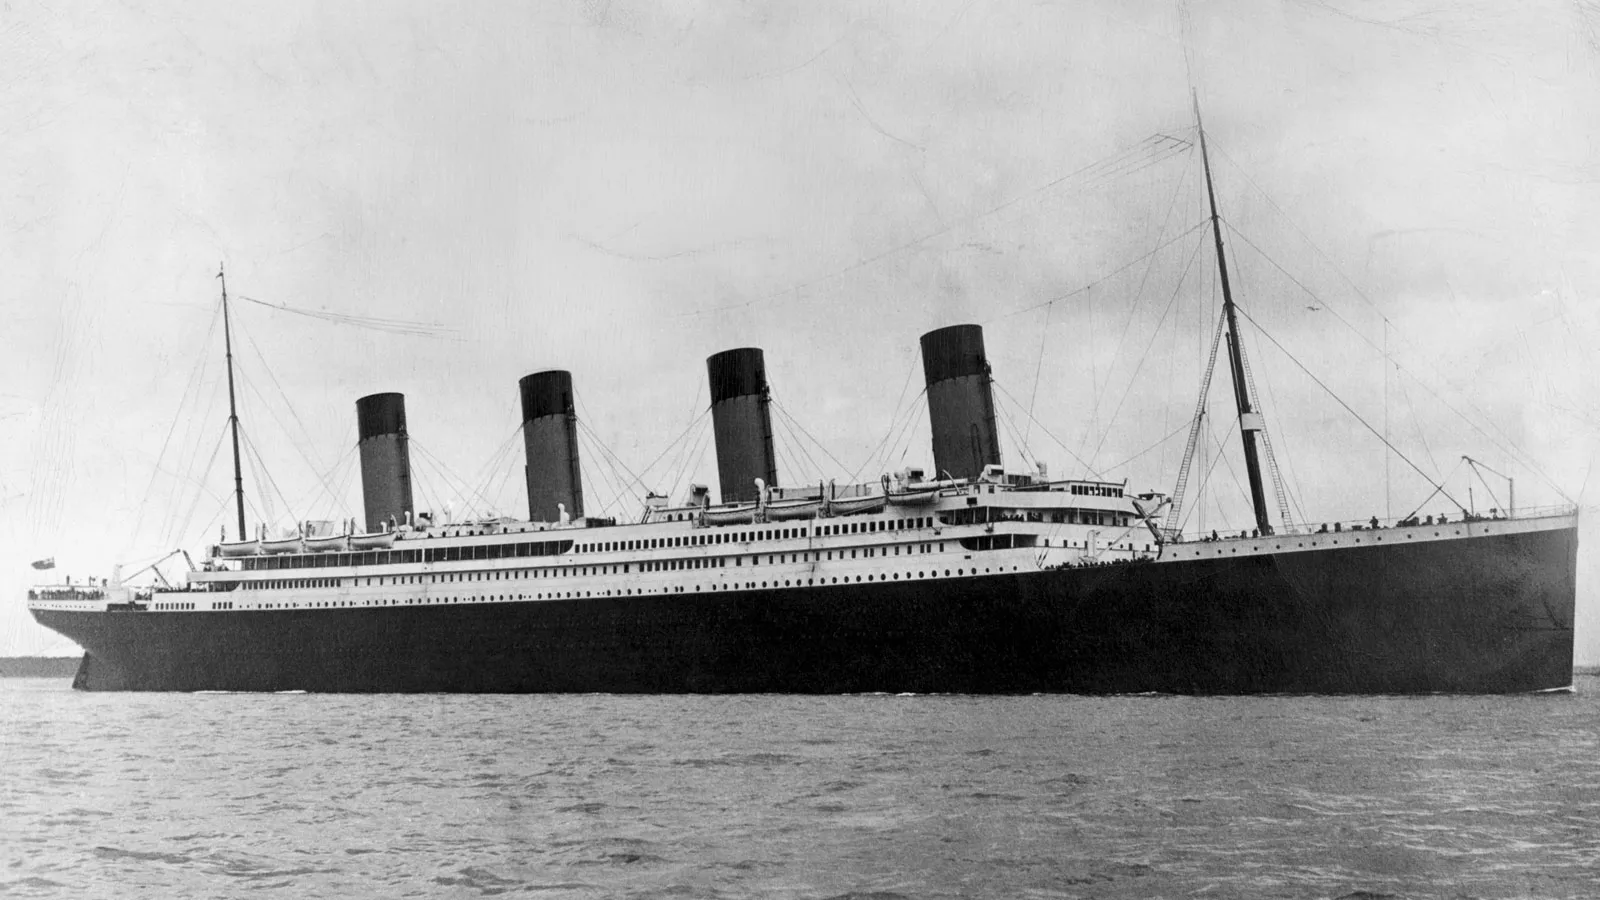

Image from [Britannica](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.britannica.com%2Ftopic%2FTitanic&psig=AOvVaw2ZVIbw-NaGdrPRt07udoj8&ust=1753177753267000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCIDo0pzWzY4DFQAAAAAdAAAAABAE)

# Titanic Survival Prediction

The **Titanic** was a British luxury steamship that tragically sank on the night of **April 14–15, 1912**, after colliding with an iceberg in the **North Atlantic Ocean**. It was en route from **Southampton, England** to **New York City, USA**, on its maiden voyage. The disaster resulted in the loss of over **1,500 passengers and crew**.

The **Titanic dataset** is widely used in **exploratory data analysis (EDA)** and **predictive modeling** due to its rich mix of numerical and categorical features. In this project, we will explore the data and build models to **predict passenger survival**.


# Dataset

- Source: [Kaggle dataset](https://www.kaggle.com/datasets/yasserh/titanic-dataset?resource=download)
- Features: Name, Age, Sex, Ticket, Fare, Pclass, SibSp, Parch, Embarked, Survival


### Titanic Dataset Column Descriptions

| Column        | Description |
|---------------|-------------|
| **PassengerId** | Unique identifier for each passenger |
| **Survived**    | Survival status (0 = No, 1 = Yes) |
| **Pclass**      | Passengers ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) |
| **Name**        | Full name of the passenger |
| **Sex**         | Gender of the passenger |
| **Age**         | Age in years |
| **SibSp**       | Number of siblings or spouses aboard |
| **Parch**       | Number of parents or children aboard |
| **Ticket**      | Ticket number |
| **Fare**        | Passenger fare (in British pounds) |
| **Cabin**       | Cabin number|
| **Embarked**    | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |


In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
plt.style.use('ggplot')
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# Reading in the data and displaying the top 5 rows
Data = 'Titanic-Dataset.csv'
titanic_data = pd.read_csv(Data, index_col='PassengerId') # we will be setting the passenger id as the index
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Basic information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


The dataframe has 11 columns and 891 rows, it contains different datatypes which includes categorical, numerical and strings. The dataframe shows missing rows.

In [ ]:
# Describing the numerical columns
titanic_data.describe(include='number').T


,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


From the summary before cleaning, we can understand that mean age is 29 years and the average fare price is 32 pounds and was as high as 512 pounds.

In [ ]:
# Describing the categorical columns
titanic_data.describe(include='object').T

,count,unique,top,freq
Name,891,891,"Dooley, Mr. Patrick",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


The object description show that there were both male and females as passenger and the male were the majority,  most passersengers embarkerd from Southampton, England.

In [ ]:
# Checking for missing data
titanic_data.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


There are missing values in the Age column, Cabin and Embarked. the Cabin column has the highest number of missing entries.

In [ ]:
# Checing for duplicated rows
titanic_data.duplicated().sum()

np.int64(0)

There are no duplicated rows in the dataframe

## **Data Cleaning**


In [ ]:
# Listing out the columns with their dtypes
titanic_data.dtypes

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [ ]:
# Defining a funtion that cleans the data
def clean_data(df):
    """
    Cleans the Titanic dataset:
    - Converts columns to appropriate data types
    - Extracts titles from names
    - Drops irrelevant columns
    - Renames columns for clarity
    - Resets index to serve as new ID
    """
    # Convert data types
    df['Survived'] = df['Survived'].astype('category')
    df['Pclass'] = df['Pclass'].astype('category')
    df['Embarked'] = df['Embarked'].astype('category')
    df['Sex'] = df['Sex'].astype('category')
    df['Age'] = df['Age'].astype('float')
    df['Fare'] = df['Fare'].astype('float')

    # Convert the sex category to title
    df['Sex'] = df['Sex'].str.title()

    # Standardizing the fare values into 2 decimal places
    df['Fare'] = df['Fare'].round(2)

    # Changing the abrrevations of embarked into full name for readability
    embarked_dict = {'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'}
    df['Embarked'] = df['Embarked'].map(embarked_dict)

    # Extract title from name
    df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)



    # Drop irrelevant columns if present
    drop_cols = ['Ticket', 'Name', 'Cabin']
    df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

    # Rename columns
    rename_map = {
        'Survived': 'survived',
        'Pclass': 'p_class',
        'Sex': 'sex',
        'Age': 'age',
        'Fare': 'fare',
        'Embarked': 'embarked',
        'SibSp': 'siblings_or_spouses_aboard',
        'Parch': 'parents_or_children_aboard',
        'Title': 'title'
    }
    df.rename(columns={k: v for k, v in rename_map.items() if k in df.columns}, inplace=True)

    # Reset index to serve as unique ID
    df.reset_index(drop=True, inplace=True)
    df.index.name = 'id'

    return df


In [ ]:
# Applying the funtion to a copy of the titanic_data df
df = clean_data(titanic_data.copy())
df.head()

,survived,p_class,sex,age,siblings_or_spouses_aboard,parents_or_children_aboard,fare,embarked,title
id,,,,,,,,,
0,0,3,Male,22.0,1,0,7.25,Southampton,Mr
1,1,1,Female,38.0,1,0,71.28,Cherbourg,Mrs
2,1,3,Female,26.0,0,0,7.92,Southampton,Miss
3,1,1,Female,35.0,1,0,53.10,Southampton,Mrs
4,0,3,Male,35.0,0,0,8.05,Southampton,Mr


The dataframe contains 9 column with a new index.

In [ ]:
# Describing the numerical data in the df
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
age,714.0,29.699118,14.526497,0.42,20.125,28.00,38.0,80.00
siblings_or_spouses_aboard,891.0,0.523008,1.102743,0.00,0.000,0.00,1.0,8.00
parents_or_children_aboard,891.0,0.381594,0.806057,0.00,0.000,0.00,0.0,6.00
fare,891.0,32.204366,49.693414,0.00,7.910,14.45,31.0,512.33


In [ ]:
# Describing the categorical data in the df
df.describe(include='object').T

,count,unique,top,freq
sex,891,2,Male,577
title,891,17,Mr,517


In [ ]:
# Data imputation
# Inspecting the age column
df['age'].describe()

,age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


The data column shows variation in the age statistics, the mean age is 29, the minimun age is about 4-5 months and the maximun is 80.

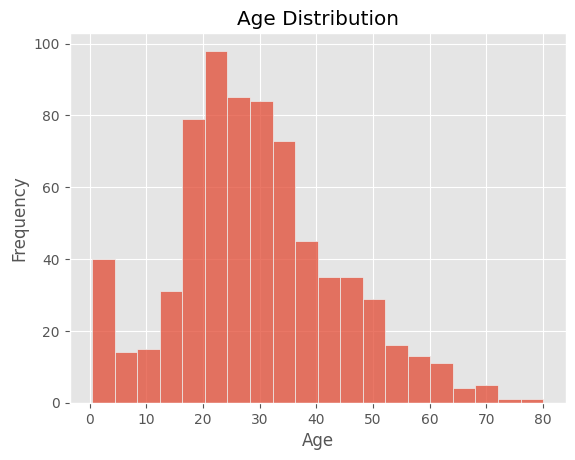

In [ ]:
# Histogram of the age
sns.histplot(df['age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The histogram shows a right skewed distribution of the age column, with values of the age at both extremes.

In [ ]:
# Displaying the rows with missing age, from the categorical columns
df[df['age'].isnull()].describe(include='object')

,sex,title
count,177,177
unique,2,5
top,Male,Mr
freq,124,119


From our analysis, we observed that missing age values are concentrated in only 5 out of the 17 unique titles. Given that titles encapsulate social roles and can reflect social class and life stage (e.g., 'Master' typically being a young boy, 'Mrs' a married woman), we can leverage this domain knowledge to inform our imputation.

Instead of using the global mean or a blanket average across all titles, we propose a refined method:

For each **title** with **missing age** values, we compute the mean age only from rows where that title has non-missing ages. This ensures that we preserve the internal distribution within each title and avoid introducing bias from unrelated groups.

This strategy helps maintain class-specific age characteristics, making our imputation more context-aware and reducing the risk of distorting the age feature during modeling.



In [ ]:
# Function for age imputation
def age_imputation(df):
    # Get only titles with missing age values
    titles_with_missing_age = df[df['age'].isnull()]['title'].unique()

    # For each title with missing age, compute mean age from available (non-null) values
    for title in titles_with_missing_age:
        mean_age = df[(df['title'] == title) & (df['age'].notnull())]['age'].mean()

        # Fill missing values for this title with the computed mean
        df.loc[(df['title'] == title) & (df['age'].isnull()), 'age'] = mean_age

    return df


In [ ]:
# Apply the age_impute function to the cleaned DataFrame
df_imputed_age = age_imputation(df.copy())

# Check for missing values in the 'age' column after imputation
print("Missing values after age imputation:")
print(df_imputed_age.isnull().sum())

Missing values after age imputation:
survived                      0
p_class                       0
sex                           0
age                           0
siblings_or_spouses_aboard    0
parents_or_children_aboard    0
fare                          0
embarked                      2
title                         0
dtype: int64


All missing values for age has been filled.

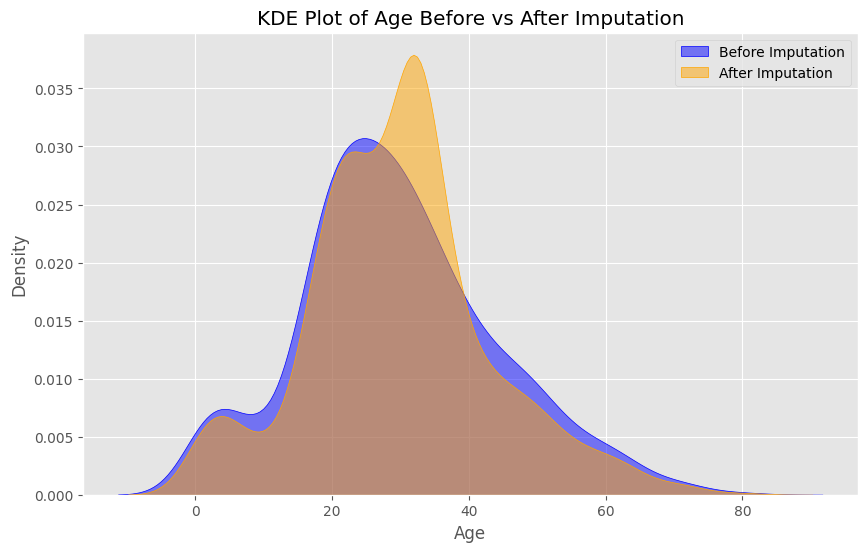

In [ ]:
# KDE plot for comparism of age before and after imputation
plt.figure(figsize=(10, 6))

sns.kdeplot(df['age'], label='Before Imputation', color='blue',  alpha=0.5, fill = True)
sns.kdeplot(df_imputed_age['age'], label='After Imputation', color='orange',  alpha=0.5, fill = True)

plt.legend()
plt.title("KDE Plot of Age Before vs After Imputation")
plt.xlabel("Age")
plt.ylabel("Density")
plt.grid(True)
plt.show()


The plot shows the Kde plot of the age before and after imputation, there is an obvious change in the distribution, with new and longer peaks between 30 and 40 ages.

In [ ]:
# Impuation of the embarked column
# The msssing data in the embarked column are only two in number
# we can fill with the highest appearring location of embarkation
df_imputed_age['embarked'].value_counts()

,count
embarked,
Southampton,644
Cherbourg,168
Queenstown,77


Southhampton seems to be the highest appearing embarkment location, this is of no surprise as the titanic originally boarded from there.

In [ ]:
# Filling the missing rows with 'Southampton'
df_imputed_age['embarked'] = df_imputed_age['embarked'].fillna('Southampton')

print("Missing values after imputation:")
print(df_imputed_age.isnull().sum())


Missing values after imputation:
survived                      0
p_class                       0
sex                           0
age                           0
siblings_or_spouses_aboard    0
parents_or_children_aboard    0
fare                          0
embarked                      0
title                         0
dtype: int64


In [ ]:
# Inspecting the title column
df_imputed_age['title'].value_counts()

,count
title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


The title column contains several unique titles, many of which are contextually similar or identical in meaning. For instance, "Mme" is the French equivalent of "Mrs" (used for married women), while "Mlle" corresponds to "Miss" (used for unmarried women). This indicates that some passengers may have been recorded with honorifics from other languages or cultures, especially French.
Some of the titles like lady, Sir, Jonkheer, Countess, signifies royalty, while others like Doc, Rev, Col, Major signifies high ranking individuals in professional and military.

To reduce redundancy and enhance contextual consistency, we can group and rename similar titles. This not only simplifies the feature but also helps the model generalize better by focusing on meaningful social categories rather than minor variations in titles.

In [ ]:
# Dictionary for mapping the titles
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Officer',
    'Rev': 'Officer',
    'Col': 'Officer',
    'Major': 'Officer',
    'Capt': 'Officer',
    'Don': 'Noble',
    'Sir': 'Noble',
    'Countess': 'Noble',
    'Lady': 'Noble',
    'Jonkheer': 'Noble',
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs'
}

df_imputed_age['title'] = df_imputed_age['title'].map(title_mapping)


In [ ]:
# Value counts of the title column
df_imputed_age['title'].value_counts()

,count
title,
Mr,517
Miss,185
Mrs,126
Master,40
Officer,18
Noble,5


In [ ]:
# Creating a df_clean from copy of the df_imputed_age
df_clean = df_imputed_age.copy()

So, we now have a cleaned dataframe that we can use for exploratory data analysis.

## Exploratory data analysis.

In [ ]:
df_clean.head()

,survived,p_class,sex,age,siblings_or_spouses_aboard,parents_or_children_aboard,fare,embarked,title
id,,,,,,,,,
0,0,3,Male,22.0,1,0,7.25,Southampton,Mr
1,1,1,Female,38.0,1,0,71.28,Cherbourg,Mrs
2,1,3,Female,26.0,0,0,7.92,Southampton,Miss
3,1,1,Female,35.0,1,0,53.10,Southampton,Mrs
4,0,3,Male,35.0,0,0,8.05,Southampton,Mr


In [ ]:
# Defining a function that annotates countplot
def annotate_countplot(ax, precision=1, offset=2, fontsize=10, fontweight='bold'):
    """
    Annotates a countplot with percentage labels on top of each bar.

    Args:
        ax (matplotlib.axes.Axes): The axis object containing the countplot.
        precision (int): Number of decimal places in the percentage.
        offset (int): Vertical offset in points above the bar.
        fontsize (int): Font size of the annotation text.
        fontweight (str): Font weight of the annotation text.

    Returns:
        ax (matplotlib.axes.Axes): The same axis with annotations added.
    """
    total = sum(p.get_height() for p in ax.patches)
    for p in ax.patches:
        height = p.get_height()
        if height == 0:
          continue
        if total > 0:
            percentage = height / total
            ax.annotate(f'{percentage:.{precision}%}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom',
                        xytext=(0, offset), textcoords='offset points',
                        fontsize=fontsize, fontweight=fontweight)
    return ax


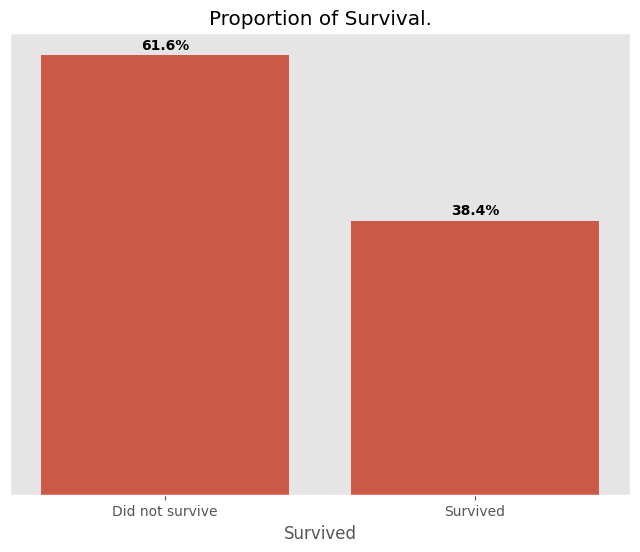

In [ ]:
# Univariate analysis
# Displaying the proportion of those that survived and did not
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'survived', data = df_clean)
annotate_countplot(ax, 1)
ax.set_xticklabels(['Did not survive', 'Survived'])
ax.set_xlabel('Survived')
ax.set_yticks([])
ax.set_ylabel("")
plt.title('Proportion of Survival.')
plt.show()

The plot shows that Majority of the passegers of the Titanic did not survive and just about 38% survived, this shows that there is imbalance in the survival classses.

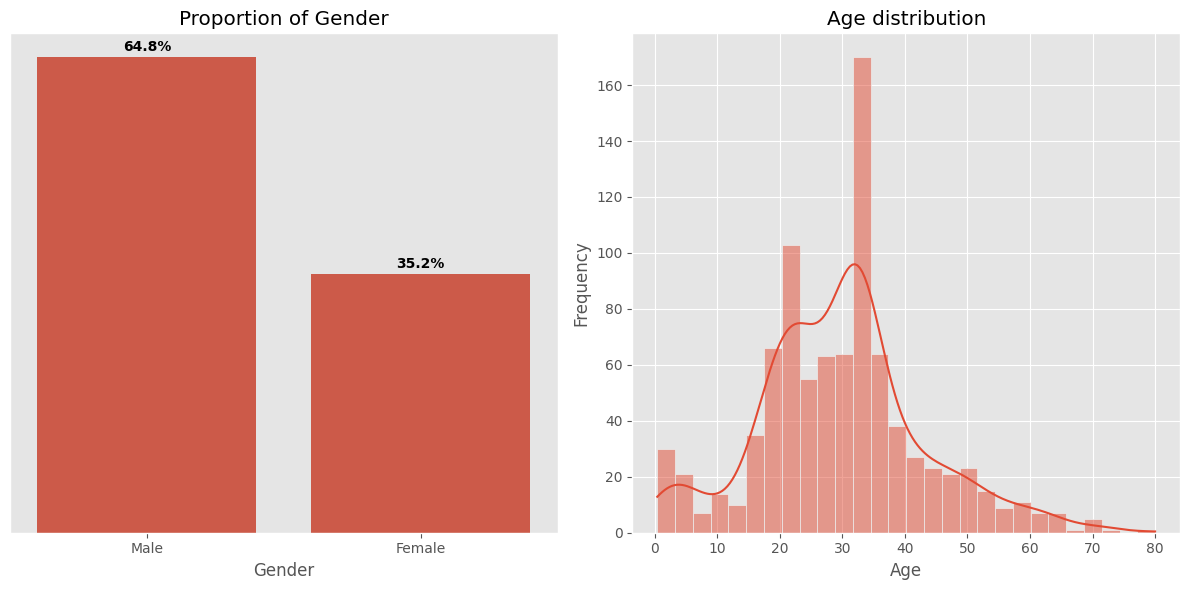

In [ ]:
# Univariate analysis of Gender and Age distribution
# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot 1: Gender
sns.countplot(x='sex', data=df_clean, ax=axes[0])
annotate_countplot(axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel("")
axes[0].set_yticks([])
axes[0].set_title('Proportion of Gender')

# Plot 2: Age
sns.histplot(df_clean['age'], kde=True, ax=axes[1])
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Age distribution')

plt.tight_layout()
plt.show()


The gender proportion plot shows that we had more males(64.8%) on board than the females(35.2%).

The distribution of age shows a bimodal distribution, the first peak shows majority of ages at 20-23(young adults) and the second peak shows majority of ages from 31 - 34(adults),  the majority of the age distribution fall between 20 - 40 range with steady decline in frequency from 40 years  and above.

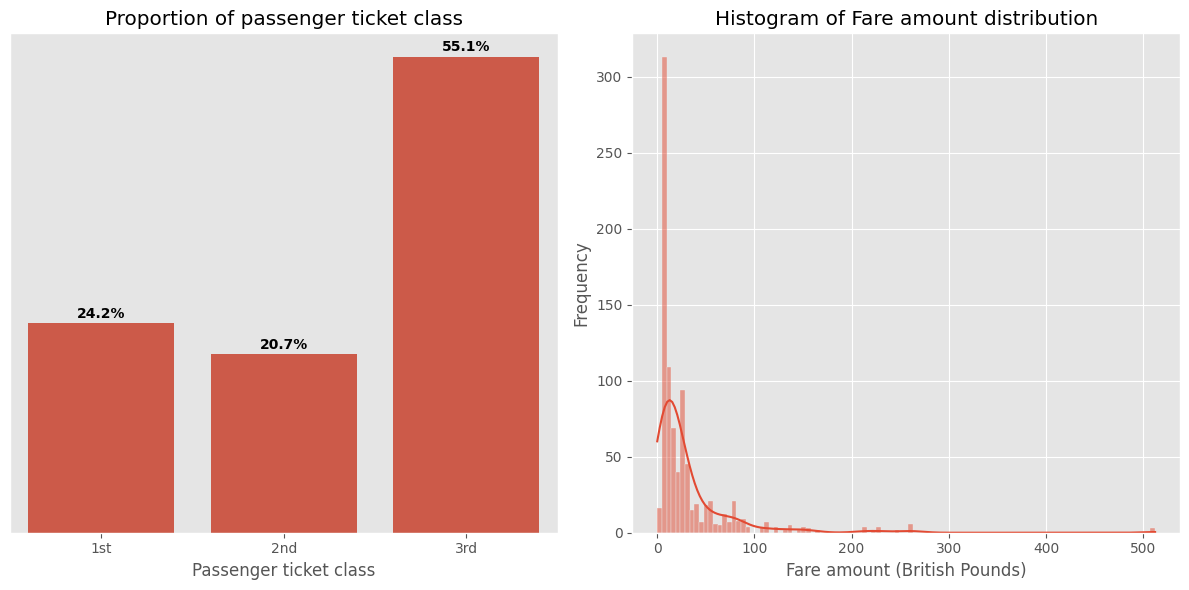

In [ ]:
# Univariate analysis of the Passengers ticket class and the Fare

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes = axes.flatten()

# Plot 1: Passenger ticket class
sns.countplot(x='p_class', data=df_clean, ax=axes[0])
annotate_countplot(axes[0])
axes[0].set_xlabel('Passenger ticket class')
axes[0].set_xticklabels(['1st', '2nd', '3rd'])
axes[0].set_ylabel("")
axes[0].set_yticks([])
axes[0].set_title('Proportion of passenger ticket class')

# Plot 2: Fare amount (British Pounds)
sns.histplot(df_clean['fare'], kde=True, ax=axes[1])
axes[1].set_xlabel('Fare amount (British Pounds)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Fare amount distribution')

plt.tight_layout()
plt.show()


The first plot shows majority of the passengers(55%) boarded with the third class ticket, and 24.2 and 20.7 % boarded with the first class and second class ticket respectfully.

The second plot shows the distribution of the passengers fare paid in british pounds. the plot shows a right skewed distribution of fares with majority of passengers paying less than 100 pounds for the transportation and very few passengers paying above 100 - 500 pounds.

This clearly shows class distribution of the passengers.

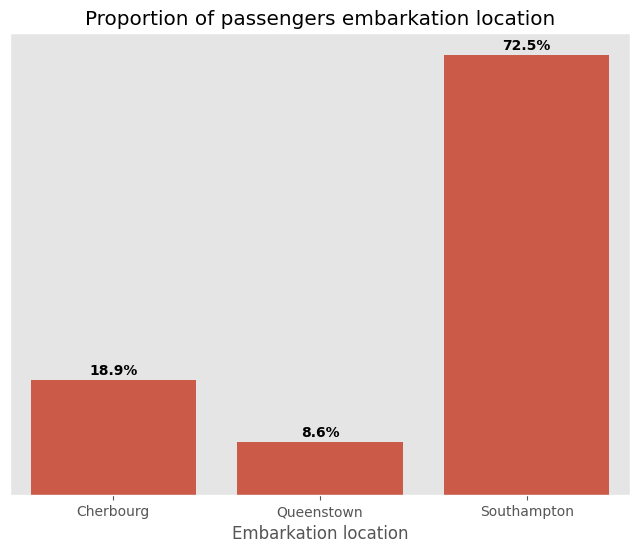

In [ ]:
# Univariate analysis of the Embarkation location
plt.figure(figsize=(8, 6))

# Passengers embarkation location
ax = sns.countplot(x='embarked', data=df_clean)
annotate_countplot(ax)
ax.set_xlabel('Embarkation location')
ax.set_ylabel("")
ax.set_yticks([])
ax.set_title('Proportion of passengers embarkation location')

plt.show()

The plot shows that majority of the passengers that boarded the Titanic did in Southampton, followed by Cherbourg then Queenstown, this isn't surprising as it follows the pattern of the titanic travel path, the titanic departed from Southhampton, hence has the most passengers, made it's first stop at the Cherboug and it's second stop at Queenstown before setting out to the ocean.


In [ ]:
# Univariate analysis of the Title column
# Count each title
title_counts = df_clean['title'].value_counts()

# Create the pie chart
fig = px.pie(
    df_clean,
    names='title',
    title='Pie Chart of Passenger Titles',
    color_discrete_sequence=px.colors.qualitative.Prism
)

# Create a 'pull' array with 0.1 for the largest slice, 0 for others
largest_title = title_counts.idxmax()
pull_values = [0.1 if title == largest_title else 0 for title in df_clean['title'].unique()]

# Update the pie chart
fig.update_traces(
    texttemplate='%{label}: %{percent:.1%}',
    pull=pull_values
)

fig.show()


The piechart shows the distribution of the paassengers according to their honorifics and social status, Married men denoted as Mister has the largest distribution followed by Miss, the proffesional and milllitary personnel e.g Doc, Rev, Col and the nobels contribute to the lowest proportion of passengers.

<Figure size 1200x600 with 0 Axes>

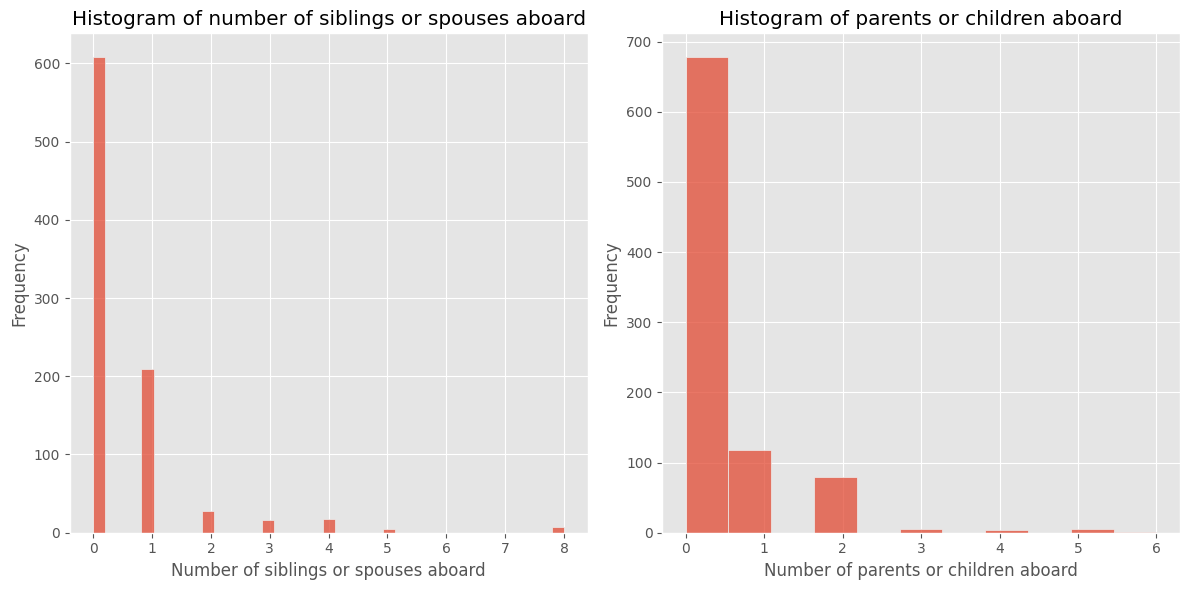

In [ ]:
# Univariate analysis of the number spouse or siblings aboard and number of parents or children abroad
plt.figure(figsize=(12, 6))
# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes = axes.flatten()

# Plot 1: Number of spouse or children abroad
sns.histplot(df_clean['siblings_or_spouses_aboard'], ax=axes[0])
axes[0].set_xlabel('Number of siblings or spouses aboard')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of number of siblings or spouses aboard')

#

# Plot 2: Number of parents or children aboard

sns.histplot(df_clean['parents_or_children_aboard'], ax=axes[1])
axes[1].set_xlabel('Number of parents or children aboard')
axes[1].set_ylabel("Frequency")
axes[1].set_title('Histogram of parents or children aboard')
plt.tight_layout()
plt.show()



Siblings/Spouses Aboard
The distribution shows that the vast majority of passengers did not have any siblings or spouses aboard the ship. A small number had exactly one, while occurrences of two or more were rare. Notably, approximately 200 passengers had exactly one sibling or spouse aboard.

Parents/Children Aboard
A similar trend is observed in the Parch variable. Most passengers were not accompanied by parents or children. Instances where passengers had one or more family members aboard were relatively uncommon.

## Bivariate analysis

In [ ]:
# df
df_clean.head()

,survived,p_class,sex,age,siblings_or_spouses_aboard,parents_or_children_aboard,fare,embarked,title
id,,,,,,,,,
0,0,3,Male,22.0,1,0,7.25,Southampton,Mr
1,1,1,Female,38.0,1,0,71.28,Cherbourg,Mrs
2,1,3,Female,26.0,0,0,7.92,Southampton,Miss
3,1,1,Female,35.0,1,0,53.10,Southampton,Mrs
4,0,3,Male,35.0,0,0,8.05,Southampton,Mr


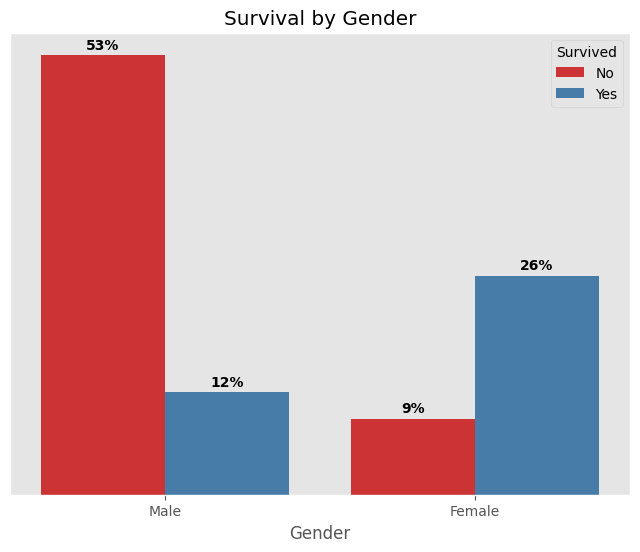

In [ ]:
# Bivariate analysis
# Inspecting the relationship between survival and sex
# Are there diparity in the survival by the gender?

# Setting figure size
plt.figure(figsize=(8, 6))

# Create the countplot
ax = sns.countplot(x='sex', hue='survived', data=df_clean, palette='Set1', stat='percent')

# Annotate the bars
annotate_countplot(ax, precision=0)

# Customize legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['No', 'Yes'], title='Survived', loc='upper right')

# Set axis labels and title
ax.set_xlabel('Gender')
ax.set_ylabel("")
ax.set_yticks([])
ax.set_title('Survival by Gender')

plt.show()



From the chart above it can be said that more **females** survived the Titanic incident than **male**.

The proportion of **male that did not survive** were more than the proportion **that survived**, while the proportion of the **female that survived** were **more** than the proportion of the **female that did not survive.**This is likely due to prioritization of the female gender in matters of emergency.

In [ ]:
# Bivariate analysis
# Inspecting the relationship between survival and sex
# Are there diparity in the survival by the age groups?

# To answer this we will create a new column that groups the passensenger into age group
# we will use this to check the survival of passengers by age group


# Step 1: Define age bins
age_bins = [0, 10, 20, 30, 40, 60, df_clean['age'].max() + 1]

# Step 2: Define meaningful labels
age_labels = [
    'Child',         # 0–9
    'Teenager',      # 10–19
    'Young Adult',   # 20–29
    'Adult',         # 30–39
    'Middle-Aged',   # 40–59
    'Elderly'        # 60+
]

# Step 3: Apply the grouping
df_clean['age_group'] = pd.cut(
    df_clean['age'],
    bins=age_bins,
    labels=age_labels,
    right=False
)
# Step 4: Value_counts of the age groups
df_clean['age_group'].value_counts()



,count
age_group,
Adult,303
Young Adult,256
Middle-Aged,138
Teenager,102
Child,66
Elderly,26


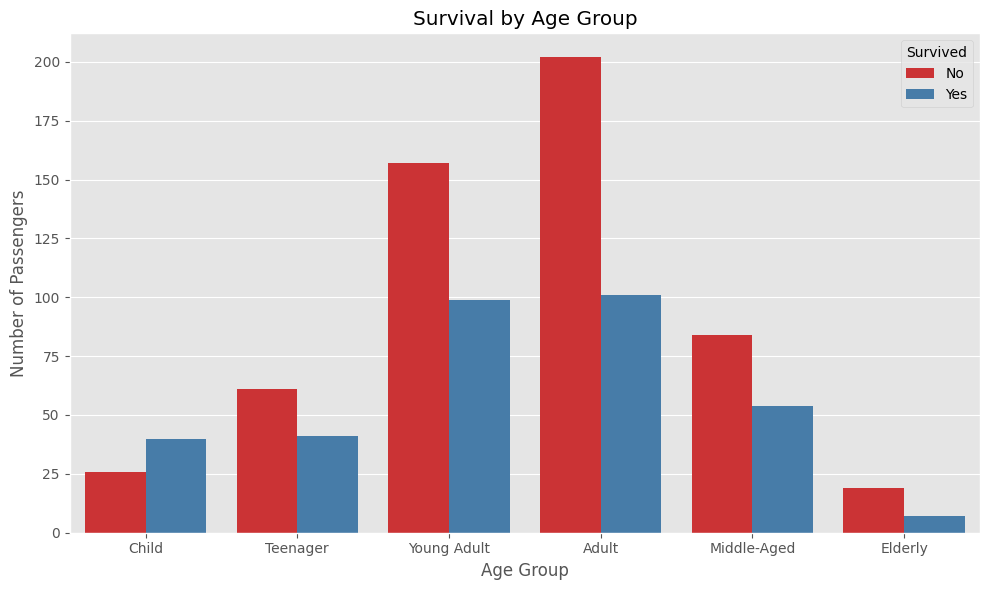

In [ ]:
# Plotting the survival status across age groups
plt.figure(figsize=(10, 6))

# Count plot
ax = sns.countplot(
    data=df_clean,
    x='age_group',
    hue='survived',
    palette='Set1'
)

# Customize legend labels from 0/1 to No/Yes
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['No', 'Yes'], title='Survived')

ax.set_title('Survival by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Passengers')

plt.tight_layout()
plt.show()


From the chart, it’s evident that:

Children (0–9 years) are the only age group where more passengers survived than died, suggesting they may have been given priority during evacuation (e.g., “women and children first” protocol).

Elderly passengers (60+ years) had the lowest survival count, possibly due to physical limitations or less prioritization during rescue efforts.

Young Adults (20–39 years) and Middle-Aged Adults (40–59 years) account for the highest number of deaths, likely because they make up a large portion of the passenger population and were not prioritized during evacuation.



<Figure size 1000x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

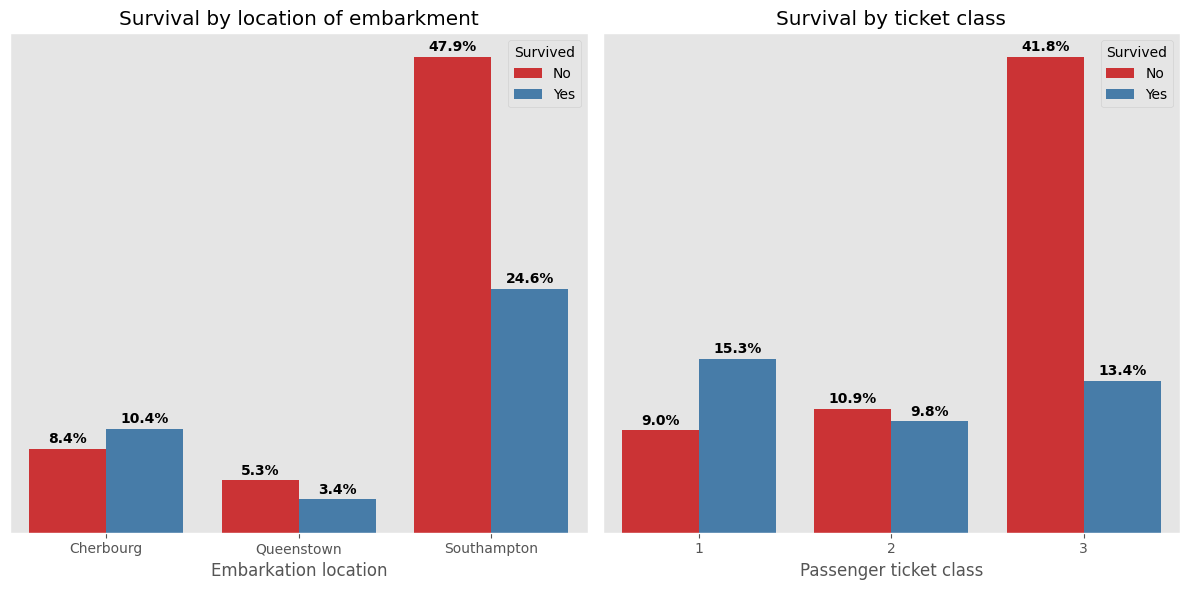

In [ ]:
# Bivariate analysis
# Are there diparity in the survival by the location of embarkment and ticket class?
# vizulizing the survival of passengers by their location of embarkment and ticket class
plt.figure(figsize=(10, 6))
plt.figure(figsize=(12, 6))
# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes = axes.flatten()

# Plot 1: Survival by location of embarkment
sns.countplot(x='embarked', hue='survived', data=df_clean, ax=axes[0], palette='Set1')
annotate_countplot(axes[0])
axes[0].set_xlabel('Embarkation location')
axes[0].set_ylabel("")
axes[0].set_yticks([])
axes[0].set_title('Survival by location of embarkment')
# Legend
handles, labels = ax.get_legend_handles_labels()
axes[0].legend(handles=handles, labels=['No', 'Yes'], title='Survived', loc='upper right')

# Plot 2: Survival by ticket class

sns.countplot(x='p_class', hue='survived', data=df_clean, ax=axes[1], palette='Set1')
annotate_countplot(axes[1])
axes[1].set_xlabel('Passenger ticket class')
axes[1].set_ylabel("")
axes[1].set_yticks([])
axes[1].set_title('Survival by ticket class')
# Legend
handles, labels = ax.get_legend_handles_labels()
axes[1].legend(handles=handles, labels=['No', 'Yes'], title='Survived', loc='upper right')
plt.tight_layout()
plt.show()


Cherbourg stands out as the only embarkation location where more passengers survived than died.
This might suggest that passengers who boarded at Cherbourg were more likely to be from higher social or economic classes, which may have improved their chances of survival.

Southampton, despite having the highest number of survivors overall, also had the highest number of fatalities.
This is likely due to it being the main departure point, contributing the largest number of total passengers.

When looking at ticket class:

First-class passengers are the only group with more survivors than fatalities, reinforcing the idea that social status influenced survival odds.

Third-class passengers suffered the most deaths, which may reflect limited access to lifeboats, poorer cabin locations, or lower prioritization during the evacuation.

In [ ]:
# Bivariate analysis
# Are there survival disparity among the the Social class(Titles)?
# Prepare data
title_survival = pd.crosstab(df_clean['title'], df_clean['survived'], normalize='index') * 100
title_survival = title_survival.reset_index().melt(id_vars='title', value_name='Percentage')


# Map 0 → "No", 1 → "Yes"
title_survival['survived'] = title_survival['survived'].map({0: 'No', 1: 'Yes'})

# New color map for updated labels
color_map_named = {
    'No': '#D45D5D',   # Medium muted red
    'Yes': '#5D9BD4'   # Medium muted blue
}

# Plot
fig = px.bar(title_survival,
             x='Percentage',
             y='title',
             color='survived',
             orientation='h',
             color_discrete_map=color_map_named,
             title='Survival by Title.')

fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
fig.show()



The stacked chart reinforces the earlier observation that **more females survived** the Titanic disaster than males. Notably:

- Titles such as **Mrs** (married women) and **Miss** (unmarried women) had **higher survival rates**, aligning with the "women and children first" rescue approach.
- **Mr** and **Officer** — representing **adult men and professional/military personnel** — experienced the **highest fatality rates**, with survival rates well below 30%.
- Interestingly, **Master** (typically boys or young males) had a relatively high survival rate, suggesting **younger passengers were also prioritized**.
- About **60% of Nobles** (those of Royalty) survived, reflecting the possible **influence of social class** on survival chances.



## Multivariate analysis

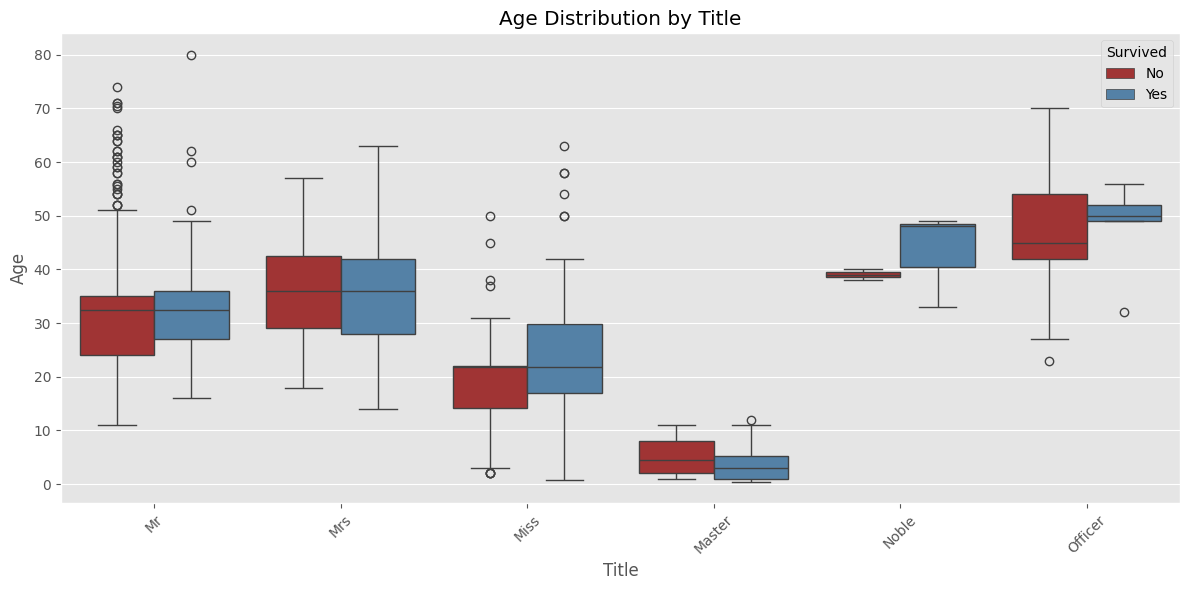

In [ ]:
# Multivariate analysis
# Survival chances of Age distribution across titles


# Define clear palette: 0 → red, 1 → blue
palette = {0: 'firebrick', 1: 'steelblue'}

plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_clean, x='title', y='age', hue='survived', palette=palette)


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['No', 'Yes'], title='Survived', loc='upper right')

ax.set_xlabel('Title')
ax.set_ylabel('Age')
ax.set_title('Age Distribution by Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.show()




This chart shows the distribution of survival of the age distribution of the Title categories, from the chart the Noble title stood out the most, most noble that survived are above 40 years of age, this could have been due to prioritization of older nobles than the younger one, the mean age of the masters that survived are less than the mean age of the maters that did not survive.

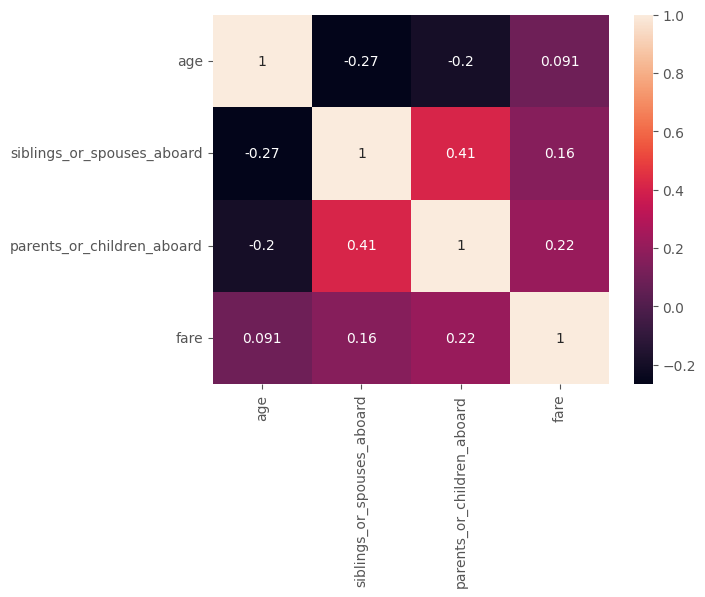

In [ ]:
# correlation heat map of the numerical variables of the dataset
matrix = df_clean.select_dtypes(include=np.number).corr()
sns.heatmap(matrix, annot=True)
plt.show()

The Correlation heatmap shows that most of the variables are not highly positively correlated, and those that show positive correlation show medium to weak correlation. Age is negatively correlated to number_of_spouses_or_children aboard also parents_or_children aboard.

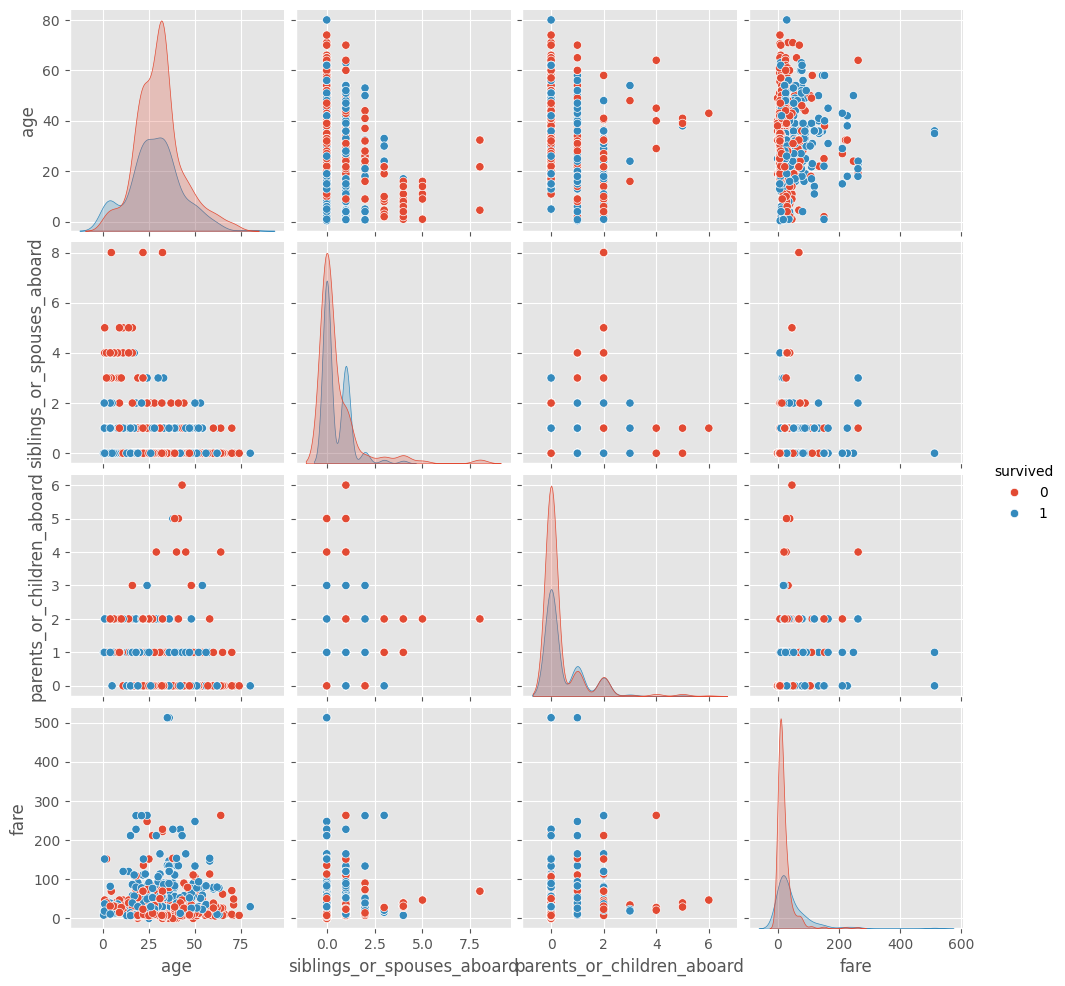

In [ ]:
# Pairplot
ax = sns.pairplot(df_clean, hue='survived')
plt.show()

The pairplot shows summary of the relationships among all numerucal variables.

### Machine learning

In [ ]:
# df
df_clean.head()

,survived,p_class,sex,age,siblings_or_spouses_aboard,parents_or_children_aboard,fare,embarked,title,age_group
id,,,,,,,,,,
0,0,3,Male,22.0,1,0,7.25,Southampton,Mr,Young Adult
1,1,1,Female,38.0,1,0,71.28,Cherbourg,Mrs,Adult
2,1,3,Female,26.0,0,0,7.92,Southampton,Miss,Young Adult
3,1,1,Female,35.0,1,0,53.10,Southampton,Mrs,Adult
4,0,3,Male,35.0,0,0,8.05,Southampton,Mr,Adult


In [ ]:
# Feature engineering
df_clean['family_size'] = df_clean['siblings_or_spouses_aboard'] + df_clean['parents_or_children_aboard'] + 1 # the one is for the indivial on the plane
df_clean['is_alone'] = (df_clean['family_size'] == 1).astype('category')
df_clean['log_fare'] = np.log1p(df_clean['fare'])
df_clean['log_fare_per_person'] = df_clean['log_fare'] / df_clean['family_size']
df_clean['age_class'] = df_clean['age_group'].astype(str) + '_' + df_clean['p_class'].astype(str)
df_clean['sex_pclass'] = df_clean['sex'] + '_' + df_clean['p_class'].astype(str)

In [ ]:
df_clean.head()

,survived,p_class,sex,age,siblings_or_spouses_aboard,parents_or_children_aboard,fare,embarked,title,age_group,family_size,is_alone,log_fare,log_fare_per_person,age_class,sex_pclass
id,,,,,,,,,,,,,,,,
0,0,3,Male,22.0,1,0,7.25,Southampton,Mr,Young Adult,2,False,2.110213,1.055107,Young Adult_3,Male_3
1,1,1,Female,38.0,1,0,71.28,Cherbourg,Mrs,Adult,2,False,4.280547,2.140274,Adult_1,Female_1
2,1,3,Female,26.0,0,0,7.92,Southampton,Miss,Young Adult,1,True,2.188296,2.188296,Young Adult_3,Female_3
3,1,1,Female,35.0,1,0,53.10,Southampton,Mrs,Adult,2,False,3.990834,1.995417,Adult_1,Female_1
4,0,3,Male,35.0,0,0,8.05,Southampton,Mr,Adult,1,True,2.202765,2.202765,Adult_3,Male_3


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   survived                    891 non-null    category
 1   p_class                     891 non-null    category
 2   sex                         891 non-null    object  
 3   age                         891 non-null    float64 
 4   siblings_or_spouses_aboard  891 non-null    int64   
 5   parents_or_children_aboard  891 non-null    int64   
 6   fare                        891 non-null    float64 
 7   embarked                    891 non-null    category
 8   title                       891 non-null    object  
 9   age_group                   891 non-null    category
 10  family_size                 891 non-null    int64   
 11  is_alone                    891 non-null    category
 12  log_fare                    891 non-null    float64 
 13  log_fare_per_person 

For the machine learning task, we will be using the Logistic regressor and the Gradient boosting classifier. Both classifier are suitable for binary claffication problem.

In [ ]:

# Define the categorical and numerical columns to be transformed
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Columns to transform
categorical_cols_transform = ['sex', 'embarked', 'p_class', 'title', 'age_group', 'age_class', 'sex_pclass', 'is_alone']
numerical_cols_transform = ['age']
passthrough_cols = ['log_fare', 'siblings_or_spouses_aboard', 'parents_or_children_aboard', 'family_size', 'log_fare_per_person']

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_transform),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols_transform),
    ],
    remainder='passthrough'  # columns not listed in transformers will be passed through
)

# Set the output format to pandas DataFrame
preprocessor.set_output(transform='pandas')

# Fit and transform the features (excluding target and unused raw column)
X = preprocessor.fit_transform(df_clean.drop(columns=['survived', 'fare']))

# Define the target variable
y = df_clean['survived']


In [ ]:
X.head()

,num__age,cat__sex_Female,cat__sex_Male,cat__embarked_Cherbourg,cat__embarked_Queenstown,cat__embarked_Southampton,cat__p_class_1,cat__p_class_2,cat__p_class_3,cat__title_Master,...,cat__sex_pclass_Male_1,cat__sex_pclass_Male_2,cat__sex_pclass_Male_3,cat__is_alone_0.0,cat__is_alone_1.0,remainder__siblings_or_spouses_aboard,remainder__parents_or_children_aboard,remainder__family_size,remainder__log_fare,remainder__log_fare_per_person
id,,,,,,,,,,,,,,,,,,,,,
0,-0.584387,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1,0,2,2.110213,1.055107
1,0.621365,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1,0,2,4.280547,2.140274
2,-0.282949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,0,1,2.188296,2.188296
3,0.395286,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1,0,2,3.990834,1.995417
4,0.395286,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0,0,1,2.202765,2.202765


In [ ]:
# train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# training and evaluating a logistic regressor model

lr_model = LogisticRegression(random_state= 41)
lr_model.fit(X_train, y_train)
lr_train_accuracy = lr_model.score(X_train, y_train)
lr_pred = lr_model.predict(X_val)
lr_test_accuracy = accuracy_score(y_val, lr_pred)
print(f"Logistic Regression training accuracy: {(lr_train_accuracy * 100):.2f}")

print(f"Logistic Regression val Accuracy: {(lr_test_accuracy * 100):.2f}")


# Classification report of the model
lr_model_1_report = classification_report(y_val, lr_pred)
print(f"The classification report of the logistic regression model")

print(lr_model_1_report)

Logistic Regression training accuracy: 84.27
Logistic Regression val Accuracy: 83.24
The classification report of the logistic regression model
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       110
           1       0.82      0.72      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



## Logistic Regression Model(1) Evaluation

The logistic regression model achieved a **training accuracy of 84.27%** and a **validation accuracy of 83.24%**, indicating good generalization performance with minimal overfitting.

However, the model exhibits **uneven performance across classes**:

- **F1 Score (Survived)**: 77%
- **F1 Score (Not Survived)**: 88%

This suggests the model is **less effective at identifying survivors**, which is likely due to **class imbalance**, the dataset contains significantly more non-survivors than survivors. Consequently, the model leans towards predicting the majority class.



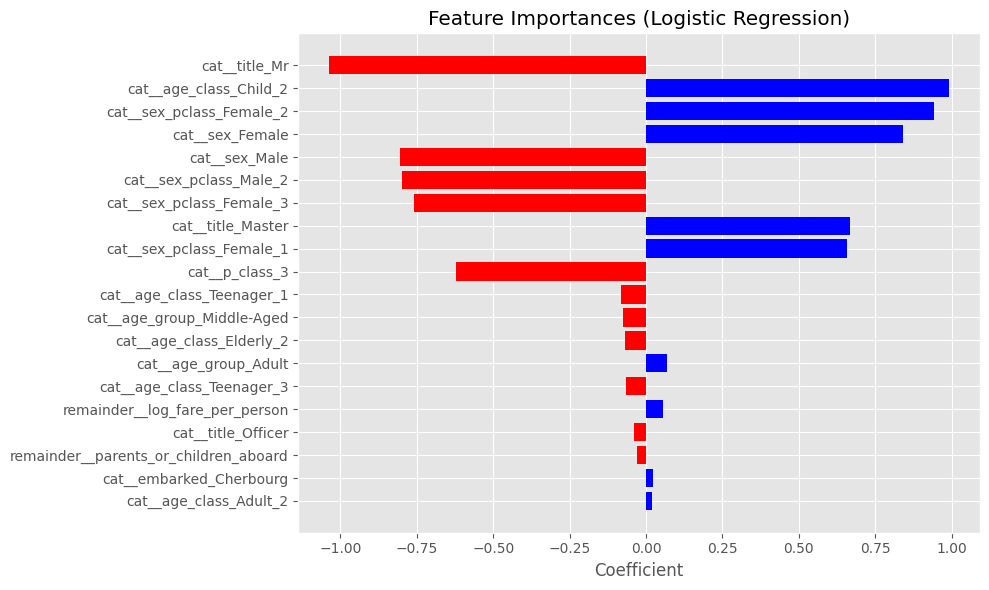

In [ ]:
# Plotting the feature importance of the model
# Getting the feature importance of the logistic regression model

def plot_logistic_feature_importance(model, feature_names, top_n=20):
    """
    Plots the top positive and negative features of a logistic regression model.

    Parameters:
    - model: trained LogisticRegression model
    - feature_names: list of feature names (from preprocessor output)
    - top_n: number of top features to display
    """
    # Get coefficients and pair with feature names
    coefs = model.coef_[0]
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefs
    })

    # Sort by magnitude
    coef_df['abs_coef'] = coef_df['Coefficient'].abs()
    coef_df = coef_df.sort_values(by='abs_coef', ascending=False).drop(columns='abs_coef')

    # Plot top N positive and negative coefficients
    top_features = pd.concat([
        coef_df.head(top_n // 2),
        coef_df.tail(top_n // 2)
    ])

    plt.figure(figsize=(10, 6))
    colors = ['blue' if c > 0 else 'red' for c in top_features['Coefficient']]
    plt.barh(top_features['Feature'], top_features['Coefficient'], color=colors)
    plt.title("Feature Importances (Logistic Regression)")
    plt.xlabel("Coefficient")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Example usage:
# X_train should be a DataFrame, so we get the column names
feature_names = X_train.columns

# Plot feature importances
plot_logistic_feature_importance(lr_model, feature_names)


The chart shows the feature importance of the logistic regression model, it shows the features that determines the predictive power of the model that classifies a passenger as either survived or did not survive.

The features in red are responsible for the model to classifiy a passenger as **DID NOT SURVIVE** while those in blue are responsible for the model to classify a passenger as **SURVIVED**.

<Figure size 800x500 with 0 Axes>

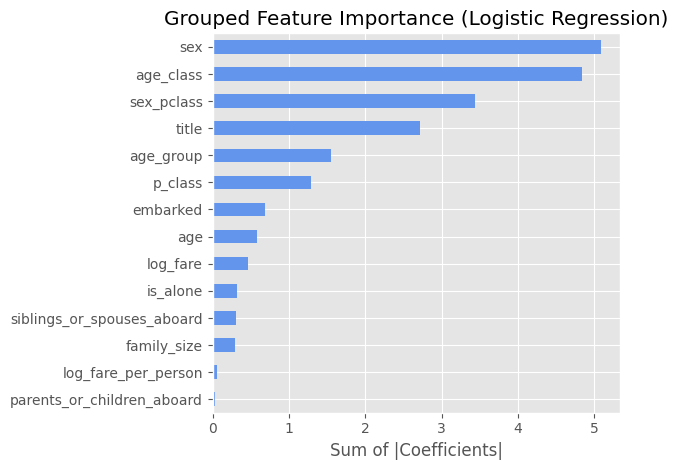

In [ ]:
# Plotting the grouped feature importance

from collections import defaultdict

def grouped_logistic_feature_importance(model, feature_names, top_n=10):
    """
    Computes and plots grouped feature importance for a Logistic Regression model
    with ColumnTransformer-style prefixed feature names.

    Parameters:
    - model: trained LogisticRegression model
    - feature_names: list of output feature names from the preprocessor (e.g., X_train.columns)
    - top_n: number of top feature groups to plot
    """
    # Define how to detect original features from prefixed names
    group_prefixes = {
        'age': ['num__age'],
        'sex': ['cat__sex_'],
        'embarked': ['cat__embarked_'],
        'p_class': ['cat__p_class_'],
        'title': ['cat__title_'],
        'age_group': ['cat__age_group_'],
        'age_class': ['cat__age_class_'],
        'sex_pclass': ['cat__sex_pclass_'],
        'is_alone': ['cat__is_alone_'],
        'siblings_or_spouses_aboard': ['remainder__siblings_or_spouses_aboard'],
        'parents_or_children_aboard': ['remainder__parents_or_children_aboard'],
        'family_size': ['remainder__family_size'],
        'log_fare': ['remainder__log_fare'],
        'log_fare_per_person': ['remainder__log_fare_per_person']
    }

    # Match features to groups
    coefs = model.coef_[0]
    coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefs})

    group_scores = defaultdict(float)

    for group_name, prefixes in group_prefixes.items():
        for prefix in prefixes:
            matched = coef_df[coef_df['feature'].str.startswith(prefix)]
            group_scores[group_name] += matched['coefficient'].abs().sum()

    # Convert to DataFrame and sort
    group_importance_df = pd.DataFrame.from_dict(group_scores, orient='index', columns=['importance'])
    group_importance_df = group_importance_df.sort_values(by='importance', ascending=False).head(top_n)

    # Plot
    plt.figure(figsize=(8, 5))
    group_importance_df.plot(kind='barh', legend=False, color='cornflowerblue')
    plt.gca().invert_yaxis()
    plt.title("Grouped Feature Importance (Logistic Regression)")
    plt.xlabel("Sum of |Coefficients|")
    plt.tight_layout()
    plt.show()



grouped_logistic_feature_importance(lr_model, X_train.columns, top_n= 15)

From the grouped feature importance chart, it can be seen that age, age_class, sex_plcass, title and age grouped are the most important groups used by the model to classify the survival. Parents_or_children aboard and log_fare_person showed very little predictive power for the model hence the features will be dropped to see how well the tuned model can improve.

In [ ]:
# printing the parameters of the logistic regression model
print(lr_model.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 41, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
# Tuning the logistic regression model and selecting important features for model training
# We are going to drop parents_or_children aboard and log_fare_per_person
# Drop weak features
cols_to_drop = ['log_fare_per_person', 'parents_or_children_aboard']
df_filtered = df_clean.drop(columns=cols_to_drop)

# Transform features and get target
X_2 = preprocessor.fit_transform(df_filtered.drop(columns=['survived', 'fare']))
y_2 = df_filtered['survived']

# Split data
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(
    X_2, y_2, test_size=0.2, random_state=42, stratify=y_2
)

# Define model
lr_model_2 = LogisticRegression()

# Define clean param grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 200, 300]
}

# Grid search
grid_search = GridSearchCV(
    estimator=lr_model_2,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit to training data
grid_search.fit(X_train_2, y_train_2)

# Best parameters
best_params = grid_search.best_params_
# Print best parameters
print("Best Hyperparameters:", best_params)



Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Hyperparameters: {'C': 1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
# using the best hyperparameters to train and test a tuned model
lr_model_2 = LogisticRegression(**best_params)
lr_model_2.fit(X_train_2, y_train_2)
lr_train_accuracy_2 = lr_model_2.score(X_train_2, y_train_2)
lr_pred_2 = lr_model_2.predict(X_val_2)
lr_test_accuracy_2 = accuracy_score(y_val_2, lr_pred_2)
print(f"Tuned Logistic Regression training accuracy: {(lr_train_accuracy_2 * 100):.2f}")
print(f"Tuned Logistic Regression val Accuracy: {(lr_test_accuracy_2 * 100):.2f}")


Tuned Logistic Regression training accuracy: 82.44
Tuned Logistic Regression val Accuracy: 83.80


In [ ]:
# comparing the classification report for the untuned and tuned model
print("📋 Classification Report Logistic regression - Before Tuning\n")
print(lr_model_1_report)

print("\n📋 Classification Report Logistic regression - After Tuning\n")
print(classification_report(y_val_2, lr_pred_2))

📋 Classification Report Logistic regression - Before Tuning

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       110
           1       0.82      0.72      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179


📋 Classification Report Logistic regression - After Tuning

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       110
           1       0.79      0.78      0.79        69

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



## Summary of Logistic Regression Performance (Before vs After Tuning)

### Key Improvements After Tuning

- **Survivor Recall:** Improved from **72% → 78%**
- **Survivor F1-Score:** Increased from **77% → 79%**
- **Overall Accuracy:** Slightly increased from **83% → 84%**
- **Model Balance:** Became more equitable across both classes

###  Interpretation

- **Before tuning**, the model was more accurate at predicting non-survivors and underperformed on identifying survivors, likely due to class imbalance.
- **After tuning**, the model showed a more balanced performance, especially improving recall and F1-score for the *Survived* class without hurting the performance on the *Not Survived* class.

###  Conclusion

Tuning enhanced the model's **fairness and generalization** by reducing bias toward the majority class.



In [ ]:
df_clean.head()

In [ ]:
# For the gradient boosting classifier, we will instantiate a new column transformer
# Tree based model do not requre scaling, so we will only be encoding our categorical features
gb_categorical_cols_transform = ['sex', 'embarked', 'p_class', 'title', 'age_group', 'age_class', 'sex_pclass', 'is_alone']
gb_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols_transform),
    ],
    remainder='passthrough'
)

# Set the output format to pandas DataFrame
gb_preprocessor.set_output(transform='pandas')

# Fit and transform the features (excluding target and unused raw column)
X = preprocessor.fit_transform(df_clean.drop(columns=['survived', 'fare']))

# Define the target variable
y = df_clean['survived']
# Train test split
X_train_gb, X_val_gb, y_train_gb, y_val_gb = train_test_split(X, y, test_size=0.2, random_state=43, stratify=y)

# Instantiating and fitting the model

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_gb, y_train_gb)
gb_train_accuracy = gb_model.score(X_train_gb, y_train_gb)
gb_pred = gb_model.predict(X_val_gb)
gb_test_accuracy = accuracy_score(y_val_gb, gb_pred)
print(f"Gradient Boosting Classifier training accuracy: {(gb_train_accuracy * 100):.2f}")
print(f"Gradient Boosting Classifier val accuracy: {(gb_test_accuracy * 100):.2f}")
# Classification report
gb_report = classification_report(y_val_gb, gb_pred)
print(f"Classification report of the gb-classifier")
print(gb_report)

Gradient Boosting Classifier training accuracy: 90.73
Gradient Boosting Classifier val accuracy: 82.12
Classification report of the gb-classifier
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



### Gradient Boosting Classifier Model(1) Evaluation

The Gradient Boosting Classifier achieved a training accuracy of **90.73%** and a validation accuracy of **82.12%**, suggesting that the model may be **overfitting** to the training data.

However, the model also demonstrates **uneven performance across classes**:

- **F1 Score (Survived):** 76%  
- **F1 Score (Not Survived):** 86%

This indicates that the model is **less effective at identifying survivors**, likely due to **class imbalance**, where the dataset contains significantly more non-survivors than survivors. As a result, the model tends to favor the majority class in its predictions.



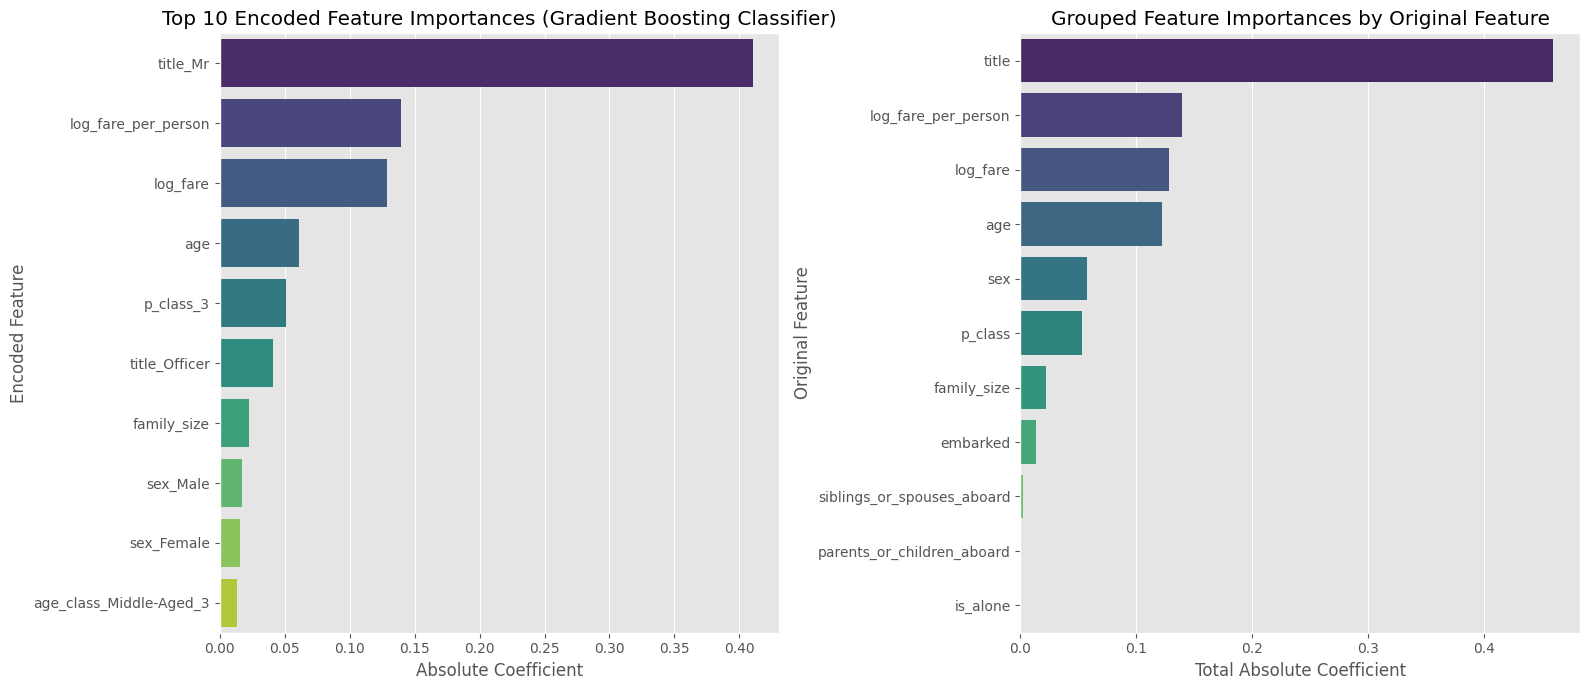

In [ ]:
#Plotting the feature importance of the model

# Step 1: Get feature names from preprocessor
# Using the preprocessor applied to the original feature set X
feature_names = preprocessor.get_feature_names_out()

# Step 2: Strip transformer prefixes like 'cat__', 'num__', 'remainder__'
feature_names = [name.split('__')[-1] for name in feature_names]

# Step 3: Get model coefficients
# Using the feature importances from the gb_model
coefficients = gb_model.feature_importances_

# Step 4: Create DataFrame with cleaned encoded feature names
coef_df = pd.DataFrame({
    'Encoded_Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

# Step 5: Known original feature names (you can add more here if needed)
known_features = ['p_class', 'sex', 'age', 'siblings_or_spouses_aboard', 'parents_or_children_aboard',
                  'embarked', 'title', 'age_group', 'family_size', 'is_alone',
                  'log_fare_per_person', 'age_class', 'sex_pclass', 'log_fare']

# Step 6: Function to match encoded name to original feature
def get_original_feature(feature_name):
    for col in known_features:
        if feature_name.startswith(col):
            return col
    return feature_name.split('_')[0]  # fallback

# Step 7: Apply to DataFrame
coef_df['Original_Feature'] = coef_df['Encoded_Feature'].apply(get_original_feature)

# Step 8: Grouped importance by original features
grouped_importance = (
    coef_df
    .groupby('Original_Feature')
    .agg({'Abs_Coefficient': 'sum'})
    .sort_values(by='Abs_Coefficient', ascending=False)
    .reset_index()
)

# Step 9: Top 10 encoded features
top_individual = coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharex=False)

# Plot 1: Top encoded features
sns.barplot(x='Abs_Coefficient', y='Encoded_Feature', data=top_individual, ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Encoded Feature Importances (Gradient Boosting Classifier)')
axes[0].set_xlabel('Absolute Coefficient')
axes[0].set_ylabel('Encoded Feature')

# Plot 2: Grouped original features
sns.barplot(x='Abs_Coefficient', y='Original_Feature', data=grouped_importance, ax=axes[1], palette='viridis')
axes[1].set_title('Grouped Feature Importances by Original Feature')
axes[1].set_xlabel('Total Absolute Coefficient')
axes[1].set_ylabel('Original Feature')

plt.tight_layout()
plt.show()


From the grouped feature importance of the Gradient Boosting Classifier, the most influential predictors were:

- **Title**
- **Log Fare**
- **Log Fare per Person**
- **Age**

These features significantly contributed to the model's predictive performance.

In contrast, the following features showed **minimal importance**:

- **Siblings or Spouses Aboard**
- **Parents or Children Aboard**
- **Is Alone**

These less impactful features will be **dropped** to evaluate whether their removal improves the model’s performance and generalization.


In [ ]:
# checking for the model parameters
print(gb_model.get_params())

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [ ]:
# Feature selection and model tuning for the gradient boosting classifier
# For the gradient boosting classifier, we will instantiate a new column transformer
# Tree based model do not requre scaling, so we will only be encoding our categorical features
gb_categorical_cols_transform = ['sex', 'embarked', 'p_class', 'title', 'age_group', 'age_class', 'sex_pclass']
gb_passthrough_cols = ['log_fare', 'log_fare_per_person']
gb_preprocessor_2 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), gb_categorical_cols_transform),
    ],
    remainder='passthrough'
)

# Set the output format to pandas DataFrame
gb_preprocessor_2.set_output(transform='pandas')

# Fit and transform the features (excluding target and unused raw column)
X_gb_2 = gb_preprocessor_2.fit_transform(df_clean.drop(columns=['survived', 'fare', 'is_alone', 'parents_or_children_aboard', 'siblings_or_spouses_aboard']))

# Define the target variable
y_gb_2 = df_clean['survived']
# Train test split
X_train_gb_2, X_val_gb_2, y_train_gb_2, y_val_gb_2 = train_test_split(X_gb_2, y_gb_2, test_size=0.2, random_state=43, stratify=y_gb_2)

# Setting hyperparameters
# Define hyperparameter grid
param_grid_gb = {
    'n_estimators': [100, 105, 110],
    'learning_rate': [0.095, 0.1, 0.15],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0]
}

# Define model
gb_classifier_2 = GradientBoostingClassifier(random_state=42)

# Grid Search setup
grid_search_gb_2 = GridSearchCV(estimator=gb_classifier_2,
                              param_grid=param_grid_gb,
                              scoring='f1',
                              cv=5,
                              verbose=1)

# Fit model
grid_search_gb_2.fit(X_gb_2, y_gb_2)

# Output best params
best_params = grid_search_gb_2.best_params_
print(" Best Hyperparameters:", best_params)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
 Best Hyperparameters: {'learning_rate': 0.095, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 110, 'subsample': 0.8}


In [ ]:
# using the best param to score
tuned_gb_model = GradientBoostingClassifier(**best_params, random_state=42)

tuned_gb_model_accuracy = tuned_gb_model.fit(X_train_gb_2, y_train_gb_2)
tuned_gb_pred = tuned_gb_model.predict(X_val_gb_2)
tuned_gb_test_accuracy = accuracy_score(y_val_gb_2, tuned_gb_pred)
print(f"Tuned Gradient Boosting Classifier training accuracy: {(tuned_gb_model_accuracy.score(X_train_gb_2, y_train_gb_2) * 100):.2f}")
print(f"Tuned Gradient Boosting Classifier test accuracy: {(tuned_gb_test_accuracy * 100):.2f}")


Tuned Gradient Boosting Classifier training accuracy: 91.29
Tuned Gradient Boosting Classifier test accuracy: 84.36


In [ ]:
# Classification report for the gradient classifier before and after tuning
print("📋 Classification Report Gradient Boosting Classifier - Before Tuning\n")
print(gb_report)

print("\n📋 Classification Report Gradient Boosting Classifier - After Tuning\n")
print(classification_report(y_val_gb_2, tuned_gb_pred))

📋 Classification Report Gradient Boosting Classifier - Before Tuning

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179


📋 Classification Report Gradient Boosting Classifier - After Tuning

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       110
           1       0.85      0.72      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



The Gradient Boosting Classifier improved after hyperparameter tuning:

Before Tuning:

* Training Accuracy: 90.73%

* Validation Accuracy: 82.12%

* F1 Score (Not Survived): 86%

* F1 Score (Survived): 76%

After Tuning:

* Training Accuracy : 91.29%
* Validation Accuracy: 84.36%

* F1 Score (Not Survived): 88%

* F1 Score (Survived): 78%


Tuning improved both overall accuracy and class balance.

The model became more confident in identifying non-survivors (↑ recall to 92%), but remained for the survivor class.

Slight improvement in correctly classifying survivors (↑ precision to 85%).

Indicates better separation between classes after tuning. However, the gradient boosting classfier still shows poor performance  in predicting the survivor class well compared to the Tuned logistic regression model.

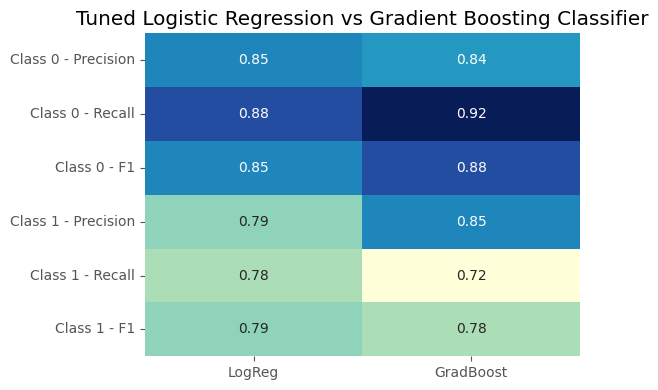

In [ ]:
# Displaying the performance metrics
data = {
    'LogReg': [0.85, 0.88, 0.85, 0.79, 0.78, 0.79],
    'GradBoost': [0.84, 0.92, 0.88, 0.85, 0.72, 0.78]
}
index = ['Class 0 - Precision', 'Class 0 - Recall', 'Class 0 - F1',
         'Class 1 - Precision', 'Class 1 - Recall', 'Class 1 - F1']

df = pd.DataFrame(data, index=index)

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".2f", cbar=False)
plt.title("Tuned Logistic Regression vs Gradient Boosting Classifier")
plt.tight_layout()
plt.show()


### Summary of Tuned Model Performance on Class 1 (Survived)

After hyperparameter tuning, both models improved, but their strengths vary across classification metrics:

| Metric       | Logistic Regression (Tuned) | Gradient Boosting Classifier (Tuned) |
|--------------|------------------------------|--------------------------------------|
| Precision    | 0.79                         | **0.85**                             |
| Recall       | **0.78**                     | 0.72                                 |
| F1-Score     | **0.79**                     | 0.78                                 |

---



- **Gradient Boosting Classifier (GBC)** achieved **higher precision (0.85)**. This means it made fewer false positive predictions when predicting passengers who survived.
- **Logistic Regression (LR)** achieved **higher recall (0.78)**. It was more effective at capturing actual survivors, though at the cost of more false positives.
- In terms of the **F1-score**, which balances both precision and recall, **Logistic Regression slightly outperformed GBC** with a score of 0.79 vs. 0.78.

---



The slightly reduced **F1-score for the tuned GBC** may stem from its **sensitivity to class imbalance**. GBC does not have a way of handling class imbalance as Logistic regresiion does.

Since survivors (class 1) were the **minority class**, the model likely struggled to improve recall, causing a drop in F1-score.

From these findings, we will be training tree-based model that supports **Class imbalance**, while having similar predictive capability of a gradient boosting classifier, LightGBM.

In [ ]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   survived                    891 non-null    category
 1   p_class                     891 non-null    category
 2   sex                         891 non-null    object  
 3   age                         891 non-null    float64 
 4   siblings_or_spouses_aboard  891 non-null    int64   
 5   parents_or_children_aboard  891 non-null    int64   
 6   fare                        891 non-null    float64 
 7   embarked                    891 non-null    category
 8   title                       891 non-null    object  
 9   age_group                   891 non-null    category
 10  family_size                 891 non-null    int64   
 11  is_alone                    891 non-null    category
 12  log_fare                    891 non-null    float64 
 13  log_fare_per_person 

In [ ]:
# 1. Import necessary libraries
from lightgbm import LGBMClassifier

# 2. Define features and target
X = df_clean.drop(columns=['survived', 'fare'])
y = df_clean['survived']

# 3. Convert categorical columns to 'category' dtype for native LightGBM handling
categorical_cols = ['p_class', 'sex', 'embarked', 'title', 'age_group',
                    'is_alone', 'age_class', 'sex_pclass']
X[categorical_cols] = X[categorical_cols].astype('category')

# 4. Train-test split with stratification
X_train_lgb, X_val_lgb, y_train_lgb, y_val_lgb = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Initialize LightGBM classifier
lgbm_model = LGBMClassifier(
    random_state=42,
    is_unbalance=True,
    n_jobs=-1
)

# 6. Train the model
lgbm_model.fit(X_train_lgb, y_train_lgb, categorical_feature=categorical_cols)

# 7. Evaluate the model
training_accuracy = lgbm_model.score(X_train_lgb, y_train_lgb)
lgbm_pred = lgbm_model.predict(X_val_lgb)
validation_accuracy = accuracy_score(y_val_lgb, lgbm_pred)

# 8. Output results
print(f"Training accuracy: {(training_accuracy * 100):.2f}%")
print(f"Validation accuracy: {(validation_accuracy * 100):.2f}%\n")
print("Classification Report of LightGBM Classifier:\n")
print(classification_report(y_val_lgb, lgbm_pred))


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 472
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

The LightGBM Classifier demonstrates strong performance on this dataset.
It achieves a high training accuracy of 97.61%, suggesting it has learned patterns in the training data very well.

Despite the high training accuracy, it generalizes effectively to unseen data with a validation accuracy of 82.12%, indicating limited overfitting.

With an F1 score of 0.77 for the survivor class (minority class), it performs comparably to the tuned GradientBoostingClassifier.

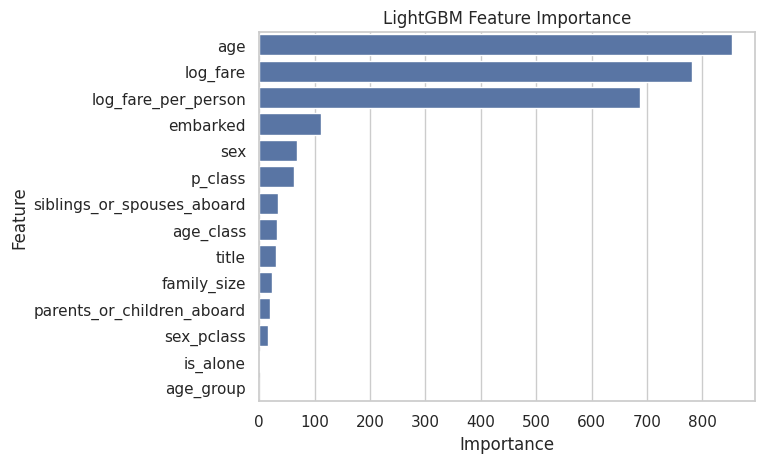

In [ ]:
# Feature importance of the model
lgbm_feature_importance = pd.DataFrame({
    'Feature': X_train_lgb.columns,
    'Importance': lgbm_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=lgbm_feature_importance)
plt.title('LightGBM Feature Importance')
plt.show()

The feature importance table shows that is_alone and age_group are the two features that do contribute much to the model.

In [ ]:
# checking the parameters of the lgbm model
print(lgbm_model.get_params())

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'is_unbalance': True}


In [ ]:
#Tuning the model
# Define the model
lgbm = LGBMClassifier(random_state=42, is_unbalance=True, n_jobs=-1)

# Define  parameter grid
param_dist = {
    'num_leaves': [15, 31, 50],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 150, 200],
    'min_child_samples': [10, 20],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0.0, 0.1], # we used reg_alpha hyperparemer which works as a regulariation paramenter and it shrinks the coef of the less important features
    'reg_lambda': [0.0, 0.1] # it also helps in reducing model complexity
}

# Cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1',
    cv=cv_strategy,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the search
random_search.fit(X_train_lgb, y_train_lgb)

# Best parameters and evaluation
print("Best parameters:\n", random_search.best_params_)
print(f"\nBest F1 score on training folds: {random_search.best_score_:.4f}")

# Evaluate on validation set
best_model = random_search.best_estimator_
y_val_pred = best_model.predict(X_val_lgb)
print("\nClassification Report on Validation Set:")

print(classification_report(y_val_lgb, y_val_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 471
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

In [ ]:
# print the training and validation accuracy
print(f"Training accuracy: {(best_model.score(X_train_lgb, y_train_lgb) * 100):.2f}%")
print(f"Validation accuracy: {(accuracy_score(y_val_lgb, y_val_pred) * 100):.2f}%")


Training accuracy: 90.03%
Validation accuracy: 83.24%


The LightGBM classifier has reduced training accuracy and increased validation accuracy after tuning, this helps reduce the overfitting of the model that happend initially. Consequently, the F1 score improved for the minority class as we can see higher F1 score of 0.79.

In [ ]:
display(comparison_df.round(2))

,Model,Training Accuracy,Validation Accuracy,Recall (Class 0 - Did not survive),Recall (Class 1 - Survived),Average Recall (Macro Avg)
0,Tuned Logistic Regression,0.82,0.84,0.87,0.78,0.83
1,Tuned Gradient Boosting Classifier,0.91,0.84,0.92,0.72,0.82
2,Tuned LightGBM Classifier,0.90,0.83,0.85,0.80,0.83


From the table comparing the results of the models, we can see that the logistic regression model and the lightgbmclassifier model performed the best, the tuned lightGBM classifier showed more balanced scores for the model compared to the tuned logistic regression model.
we will be using these two model to to do a final assesment on the test_set.

In [ ]:
# Saving the Tuned Lr model with its transformation pipeline and the Tuned Light gbm model with its pipeline
import pickle

# Save the tuned Logistic Regression model and its preprocessor
with open('tuned_lr_pipeline.pkl', 'wb') as f:
    pickle.dump({'model': lr_model_2, 'preprocessor': preprocessor}, f)

# Save the tuned LightGBM model
with open('tuned_lgbm_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Tuned Logistic Regression pipeline and Tuned LightGBM model saved successfully.")

Tuned Logistic Regression pipeline and Tuned LightGBM model saved successfully.


In [ ]:
# importing the test data
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


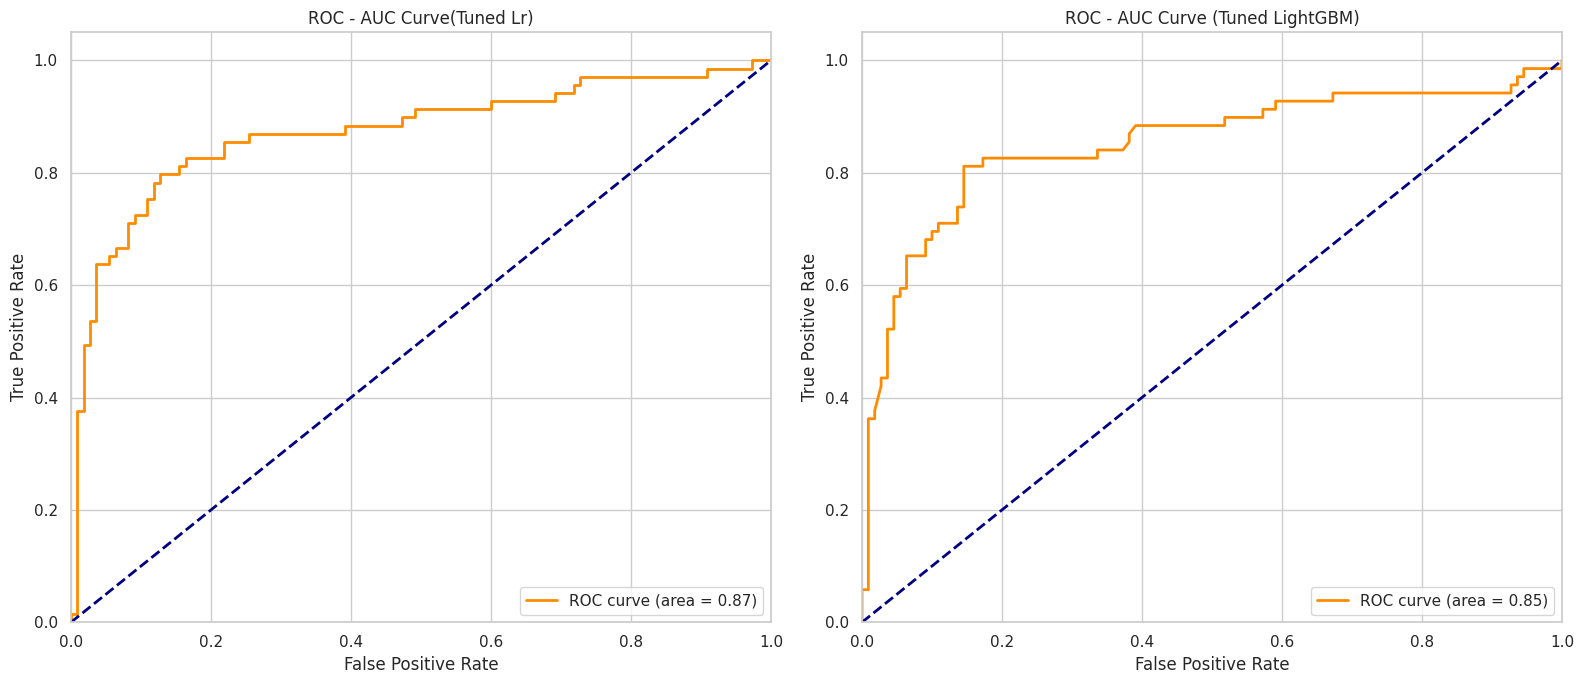

In [ ]:
# AocRuc  curve of the best models
fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharex=False)
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = lr_model_2.predict_proba(X_val_2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val_2, y_proba)
roc_auc = roc_auc_score(y_val_2, y_proba)
# plot 1
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC - AUC Curve(Tuned Lr)')
axes[0].legend(loc="lower right")


# Plot 2


y_proba_lgbm = best_model.predict_proba(X_val_lgb)[:, 1]
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_val_lgb, y_proba_lgbm)
roc_auc_lgbm = roc_auc_score(y_val_lgb, y_proba_lgbm)

# Displaying the curve
axes[1].plot(fpr_lgbm, tpr_lgbm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lgbm)
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC - AUC Curve (Tuned LightGBM)')
axes[1].legend(loc="lower right")
plt.tight_layout()
plt.show()

The ROC-AUC curve shows that the models are able to distinguish well between the survivor and non-survivor classes, rather than making random guesses. With a score of 0.87 and 85, this indicates that the models perform well in classification.

# Project Summary

Here's a summary of the Titanic Survival Prediction project:

1. **Introduction**: The project aimed to explore the Titanic dataset and build models to predict passenger survival. The dataset contains various features like Name, Age, Sex, Ticket, Fare, Pclass, SibSp, Parch, Embarked, and Survival status.
2. **Data Loading and Initial Exploration**: We loaded the dataset and performed initial checks using `head()`, `info()`, `describe()`, and `isnull().sum()` to understand the data structure, identify data types, get descriptive statistics, and check for missing values. We found missing values in the 'Age', 'Cabin', and 'Embarked' columns.
3. **Data Cleaning**: We created a `clean_data` function to preprocess the data. This involved converting columns to appropriate data types, extracting titles from names, dropping irrelevant columns ('Ticket', 'Name', 'Cabin'), renaming columns for clarity, and resetting the index.
4. **Data Imputation**: We addressed the missing values in 'Age' by imputing them with the mean age grouped by 'Title'. We imputed the missing values in 'Embarked' with the most frequent embarkation location ('Southampton'). We also standardized the 'Title' column by mapping similar titles to broader categories.
5. **Feature Engineering**: We created new features to potentially improve model performance:
   * `family_size`: The total number of family members aboard (SibSp + Parch + 1).
   * `is_alone`: A binary feature indicating whether a passenger was traveling alone.
   * `log_fare`: The logarithm of the fare (to handle skewed distribution).
   * `log_fare_per_person`: Log fare divided by family size.
   * `age_class`: Combination of age group and passenger class.
   * `sex_pclass`: Combination of sex and passenger class.
6. **Exploratory Data Analysis (EDA)**: We performed univariate and bivariate analysis to understand the distribution of individual features and their relationship with the target variable ('Survived'). Key findings included:
   * More passengers did not survive than survived.
   * There were more male passengers than female passengers.
   * Age distribution was bimodal, with peaks in the 20-23 and 31-34 ranges.
   * A majority of passengers boarded with a third-class ticket.
   * Fare distribution was right-skewed, with most passengers paying less than £100.
   * Southampton was the most frequent embarkation location.
   * More females survived than males, likely due to the "women and children first" protocol.
   * Children had a higher survival rate than other age groups.
   * First-class passengers and those who embarked at Cherbourg had higher survival rates.
   * Titles like 'Mrs' and 'Miss' had higher survival rates, while 'Mr' and 'Officer' had lower rates.
7. **Preprocessing for Machine Learning**: We used one-hot encoding to convert categorical features into a format suitable for machine learning models. We dropped the original categorical columns and the 'fare' column (as 'log_fare' was created). For the LightGBM model, we converted categorical columns to 'category' dtype for native handling.
8. **Model Building and Evaluation**:
   * We split the data into training and testing sets.
   * **Logistic Regression**: We trained an initial Logistic Regression model and evaluated its performance. The model had decent accuracy but showed some difficulty predicting the minority class ('Survived'). We then performed hyperparameter tuning and feature selection, which slightly improved the model's overall accuracy and its performance on the minority class.
   * **Gradient Boosting Classifier**: We trained a Gradient Boosting Classifier. This model showed better training and test accuracy compared to the Logistic Regression model, with improved F1 scores for both classes, especially the underrepresented class. We also tuned the Gradient Boosting model, which further improved its performance, particularly the recall for the minority class.
   * **LightGBM Classifier**: We trained and tuned a LightGBM Classifier, which is suitable for handling class imbalance. The tuned LightGBM model showed a good balance between training and validation accuracy, and an improved F1 score for the minority class compared to the Gradient Boosting Classifier.
9. **Feature Importance**: We examined the feature importance for the models. For the Logistic Regression model, Sex, Title, and Age were important. For the Gradient Boosting Classifier, Title, Log_Fare, and Sex were the most important features. For the LightGBM model, Age, Log_Fare, and Log_Fare_per_Person were the most important features.
10. **ROC-AUC Curve**: We plotted the ROC-AUC curves for the tuned Logistic Regression and LightGBM models, which showed scores of 0.87 and 0.85 respectively, indicating that the models are effective at distinguishing between the survivor and non-survivor classes.
11. **Model Saving**: We saved the tuned Logistic Regression pipeline and the tuned LightGBM model using pickle for future use.

In conclusion, through data exploration, cleaning, feature engineering, and modeling, we built and tuned predictive models for Titanic survival. The tuned LightGBM and Logistic Regression models showed the best performance in distinguishing between the survival classes, with various features contributing to their predictive power. The analysis highlighted the significant impact of factors like gender, social status (indicated by title and passenger class), age, and embarkation location on survival rates.